In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
df = pd.read_csv("train.csv")

print("Number of data points:",df.shape[0])

Number of data points: 404290


<b><font size=5>Exploratory Data Analysis</font></b>

In [57]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
id              404290 non-null int64
qid1            404290 non-null int64
qid2            404290 non-null int64
question1       404289 non-null object
question2       404288 non-null object
is_duplicate    404290 non-null int64
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [59]:
#question1 has 1 null value 
#question2 has 2 null values

In [60]:
#Let's locate which question1 was a null value
df[df.question1.isnull()]

,id,qid1,qid2,question1,question2,is_duplicate
363362,363362,493340,493341,NaN,My Chinese name is Haichao Yu. What English na...,0


In [61]:
#The Null question1 has an qid1 = 493340. 
#Let's check if there is an instance of qid = 493340 is present anywhere in the dataset with a valid question attached to it.
df[(df.qid1 == 493340) | (df.qid2 == 493340)]

,id,qid1,qid2,question1,question2,is_duplicate
363362,363362,493340,493341,NaN,My Chinese name is Haichao Yu. What English na...,0


In [62]:
#We cannot fill this null question1 with the correct question. It is better to delete the record.

In [63]:
#Let's check how many records are there where question2 is null
df[df.question2.isnull()]

,id,qid1,qid2,question1,question2,is_duplicate
105780,105780,174363,174364,How can I develop android app?,NaN,0
201841,201841,303951,174364,How can I create an Android app?,NaN,0


In [64]:
#The 2 instances of Null question2 have ids 174364. 
#Let's check if there is an instance of qid = 174364 is present anywhere in the dataset with a valid question attached to it.
df[(df.qid1 == 174364) | (df.qid2 == 174364)]

,id,qid1,qid2,question1,question2,is_duplicate
105780,105780,174363,174364,How can I develop android app?,NaN,0
201841,201841,303951,174364,How can I create an Android app?,NaN,0


In [65]:
#We cannot fill this null question1 with the correct question. It is better to delete the record.

In [66]:
#Deleting records with null in qid1 or qid2
df = df.dropna(subset=['question1','question2'])

In [67]:
#Verifying the deletes
df[(df.question1.isnull()) | (df.question2.isnull())]

,id,qid1,qid2,question1,question2,is_duplicate


In [68]:
#Let's check if there are any records where qid1 == qid2
df[df.question1 == df.question2]

,id,qid1,qid2,question1,question2,is_duplicate


In [69]:
#Let's check if a qid1, qid2 pair is repeated more than once
pair_count = df.groupby(['qid1','qid2']).size()
pair_count[pair_count > 1]

Series([], dtype: int64)

In [70]:
#The above code will not capture the scenario if qid1 and qid2 are interchanged. 
#Let's see if there cases such as qid1=N1/qid2=N2 and qid1=N2/qid2=N1.
list_of_qids_1_2 = (df['qid1'].astype(str) + '-' + df['qid2'].astype(str)).tolist() 
list_of_qids_2_1 = (df['qid2'].astype(str) + '-' + df['qid1'].astype(str)).tolist()
combined_list = pd.Series(list_of_qids_1_2 + list_of_qids_2_1)
result = combined_list.duplicated()
result[result == True]

Series([], dtype: bool)

In [71]:
#Let's check how many unique instances of qid1 are there.
len(df.qid1.unique())

290652

In [72]:
#Let's check how many unique instances of qid2 are there.
len(df.qid2.unique())

299362

In [73]:
#Based on the above queries, a question might be repeated in more than one pair.

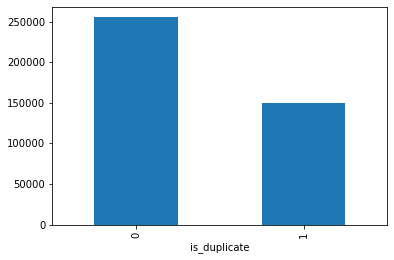

In [74]:
#Graph of duplicates vs non-duplicates
df.groupby("is_duplicate")['id'].count().plot.bar()

In [75]:
print('Not Duplicate Question Pairs (is_duplicate = 0):\n   {}%'.format(100 - round(df['is_duplicate'].mean()*100, 2)))
print('\nDuplicate Question Pairs (is_duplicate = 1):\n   {}%'.format(round(df['is_duplicate'].mean()*100, 2)))

Not Duplicate Question Pairs (is_duplicate = 0):
   63.08%

Duplicate Question Pairs (is_duplicate = 1):
   36.92%


In [91]:
#Average number of words per question
print('Mean question1 : ', df['question1'].str.split().apply(len).mean(), ' words')
print('Median question1 : ', df['question1'].str.split().apply(len).median(), ' words')
print('Mean question1 : ', df['question1'].str.split().apply(len).mean(), ' words')
print('Median question1 : ', df['question1'].str.split().apply(len).median(), ' words')

Mean question1 :  10.942256367382576  words
Median question1 :  10.0  words
Mean question1 :  10.942256367382576  words
Median question1 :  10.0  words
